In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cv2
import os
from decimal import Decimal
import numpy as np
from google.colab.patches import cv2_imshow
import pandas as pd

In [ ]:
ground_truth = pd.read_csv("GT_Translations.csv")
ground_truth

translation_x  translation_y frame_numbers
0      4.283033e-10   5.734970e-11       frame_0
1     -3.167683e-01   7.047308e-03       frame_1
2     -3.775978e-01   8.400614e-03       frame_2
3     -3.775978e-01   8.400614e-03       frame_3
4     -3.775978e-01   8.400614e-03       frame_4
...             ...            ...           ...
3317   2.569888e+01   9.769882e+00    frame_3317
3318   2.569888e+01   9.769882e+00    frame_3318
3319   2.569888e+01   9.769882e+00    frame_3319
3320   2.569888e+01   9.769882e+00    frame_3320
3321   2.569888e+01   9.769882e+00    frame_3321

[3322 rows x 3 columns]

## Görüntülerin ve kalibrasyon parametrelerinin değişkene atanması

In [ ]:
# img_path = "/content/drive/MyDrive/Teknofest/Datasets/Pozisyon_Kestirimi/Oturum1_Part2"
img_path = "/content/min_frames"
file_names = sorted([file_name for file_name in os.listdir(img_path) if file_name.endswith(('.jpg', '.png'))])

# Görüntü dosya yollarını bir listeye ekleyin
image_files = [os.path.join(img_path, file_name) for file_name in file_names]

# Görüntüleri bir diziye ekleyin
images = [cv2.imread(image) for image in image_files[:10]]

print(len(images))

10


In [ ]:
intrinsicMatrix = None
focalLength = None
principalPoint = None
radialDistortion = (-0.0091, 0.0666)
tangentialDistortion = (0,0)
imageSize = None
rotationMatrices = None
translationVectors = None
meanReprojectionError = None
reprojectionErrors = None
reprojectedPoints = None
numPatterns = None
worldPoints = None
worldUnits = None
estimateSkew = None
numRadialDistortionCoefficients = None
estimateTangentialDistortion = None

# /content/drive/MyDrive/Teknofest/Datasets/Pozisyon_Kestirimi/kalibrasyon.txt
with open('kalibrasyon.txt', 'r') as file:
    file_contents = file.readlines()


# Değişkenlere atama
for line in file_contents:
    if 'IntrinsicMatrix' in line:
      intrinsicMatrix = [[0.0 for _ in range(int(line.split(':')[1][4]))] for _ in range(int(line.split(':')[1][2]))]
      print(intrinsicMatrix)
    elif 'FocalLength' in line:
      focalLength = (float(line.split(':')[1].split()[0][1:]),float(line.split(':')[1].split()[1][:-1]))
      print(focalLength)
    elif 'PrincipalPoint' in line:
      principalPoint = (float(line.split(':')[1].split()[0][1:]),float(line.split(':')[1].split()[1][:-1]))
      print(principalPoint)
    # elif 'RadialDistortion' in line:
    #   print(float(line.split(':')[1].split()[1][:-1]))
    #   radialDistortion = (float(line.split(':')[1].split()[0][1:]),float(line.split(':')[1].split(" ")[1][:-1]))
    #   print(radialDistortion)
    # elif 'TangentialDistortion' in line:
    #   tangentialDistortion = (float(line.split(':')[1].split()[0][1:]),float(line.split(':')[1].split()[1][:-1]))
    #   print(tangentialDistortion)
    elif 'ImageSize' in line:
      imageSize = (int(line.split(':')[1].split()[0][1:]),int(line.split(':')[1].split()[1][:-1]))
      print(imageSize)
    elif 'RotationMatrices' in line:
      part = line.split(':')[1].split(" ")[1].split("x")
      rotationMatrices = [[ [0.0 for col in range(int(part[2]))] for col in range(int(part[1]))] for row in range(int(part[0][1:]))]
      print(rotationMatrices)
    elif 'TranslationVectors' in line:
      part = line.split(':')[1].split(" ")[1].split("x")
      translationVectors = [[0.0]*int(part[1])]*int(part[0][1:])
      print(translationVectors)
    elif 'MeanReprojectionError' in line:
      meanReprojectionError = float(line.split(':')[1])
      print(meanReprojectionError)
    elif 'ReprojectionErrors' in line:
      part = line.split(':')[1].split(" ")[1].split("x")
      reprojectionErrors = [[ [0.0 for col in range(int(part[2]))] for col in range(int(part[1]))] for row in range(int(part[0][1:]))]
      print(reprojectionErrors)
    elif 'ReprojectedPoints' in line:
      part = line.split(':')[1].split(" ")[1].split("x")
      reprojectedPoints = [[ [0.0 for col in range(int(part[2]))] for col in range(int(part[1]))] for row in range(int(part[0][1:]))]
      print(reprojectedPoints)
    elif 'NumPatterns' in line:
      numPatterns = int(line.split(':')[1])
      print(numPatterns)
    elif 'WorldPoints' in line:
      part = line.split(':')[1].split(" ")[1].split("x")
      worldPoints = [[0.0]*int(part[1])]*int(part[0][1:])
      print(worldPoints)
    elif 'WorldUnits' in line:
      worldUnits = line.split(':')[1].replace("'"," ").strip()
      print(worldUnits)
    elif 'EstimateSkew' in line:
      estimateSkew = int(line.split(':')[1])
      print(estimateSkew)
    elif 'NumRadialDistortionCoefficients' in line:
      numRadialDistortionCoefficients = int(line.split(':')[1])
      print(numRadialDistortionCoefficients)
    elif 'EstimateTangentialDistortion' in line:
      estimateTangentialDistortion = int(line.split(':')[1])
      print(estimateTangentialDistortion)

[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]
(1413.3, 1418.8)
(950.0639, 543.3796)
(1080, 1920)
[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

##### Intrinsic Matrix değerlerinin verlmesi

In [ ]:
intrinsicMatrix[0][0] = focalLength[0]
intrinsicMatrix[1][1] = focalLength[1]
intrinsicMatrix[0][2] = principalPoint[0]
intrinsicMatrix[1][2] = principalPoint[1]
intrinsicMatrix[2][2] = 1
intrinsicMatrix

[[1413.3, 0.0, 950.0639], [0.0, 1418.8, 543.3796], [0.0, 0.0, 1]]

### Görüntülerin Ön İşlemesi (Gri Tonlama)

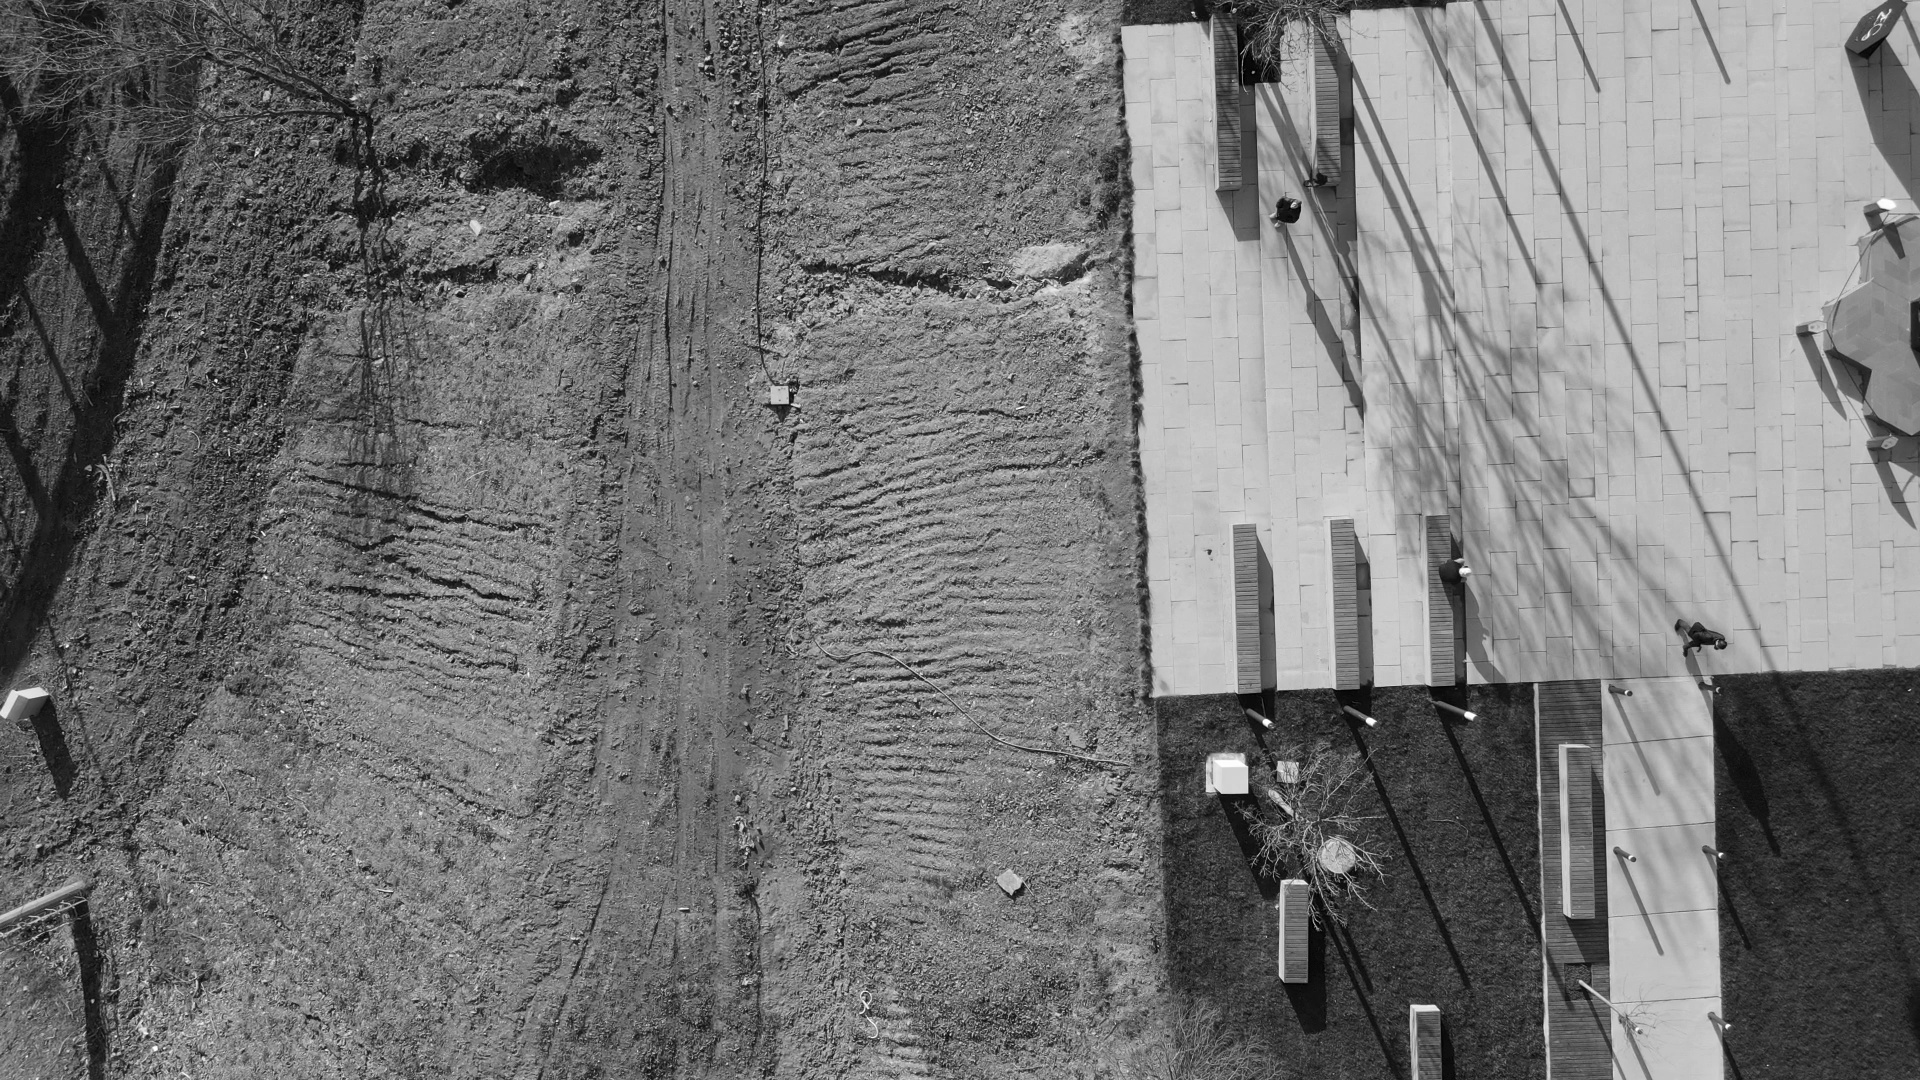

In [ ]:

for i, img in enumerate(images):
    # Görüntüyü gri tona dönüştür
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if(i == 1):
      cv2_imshow(gray_img)
    # Gri tona dönüştürülmüş görüntüyü aynı indeksteki görüntü ile güncelle
    images[i] = gray_img

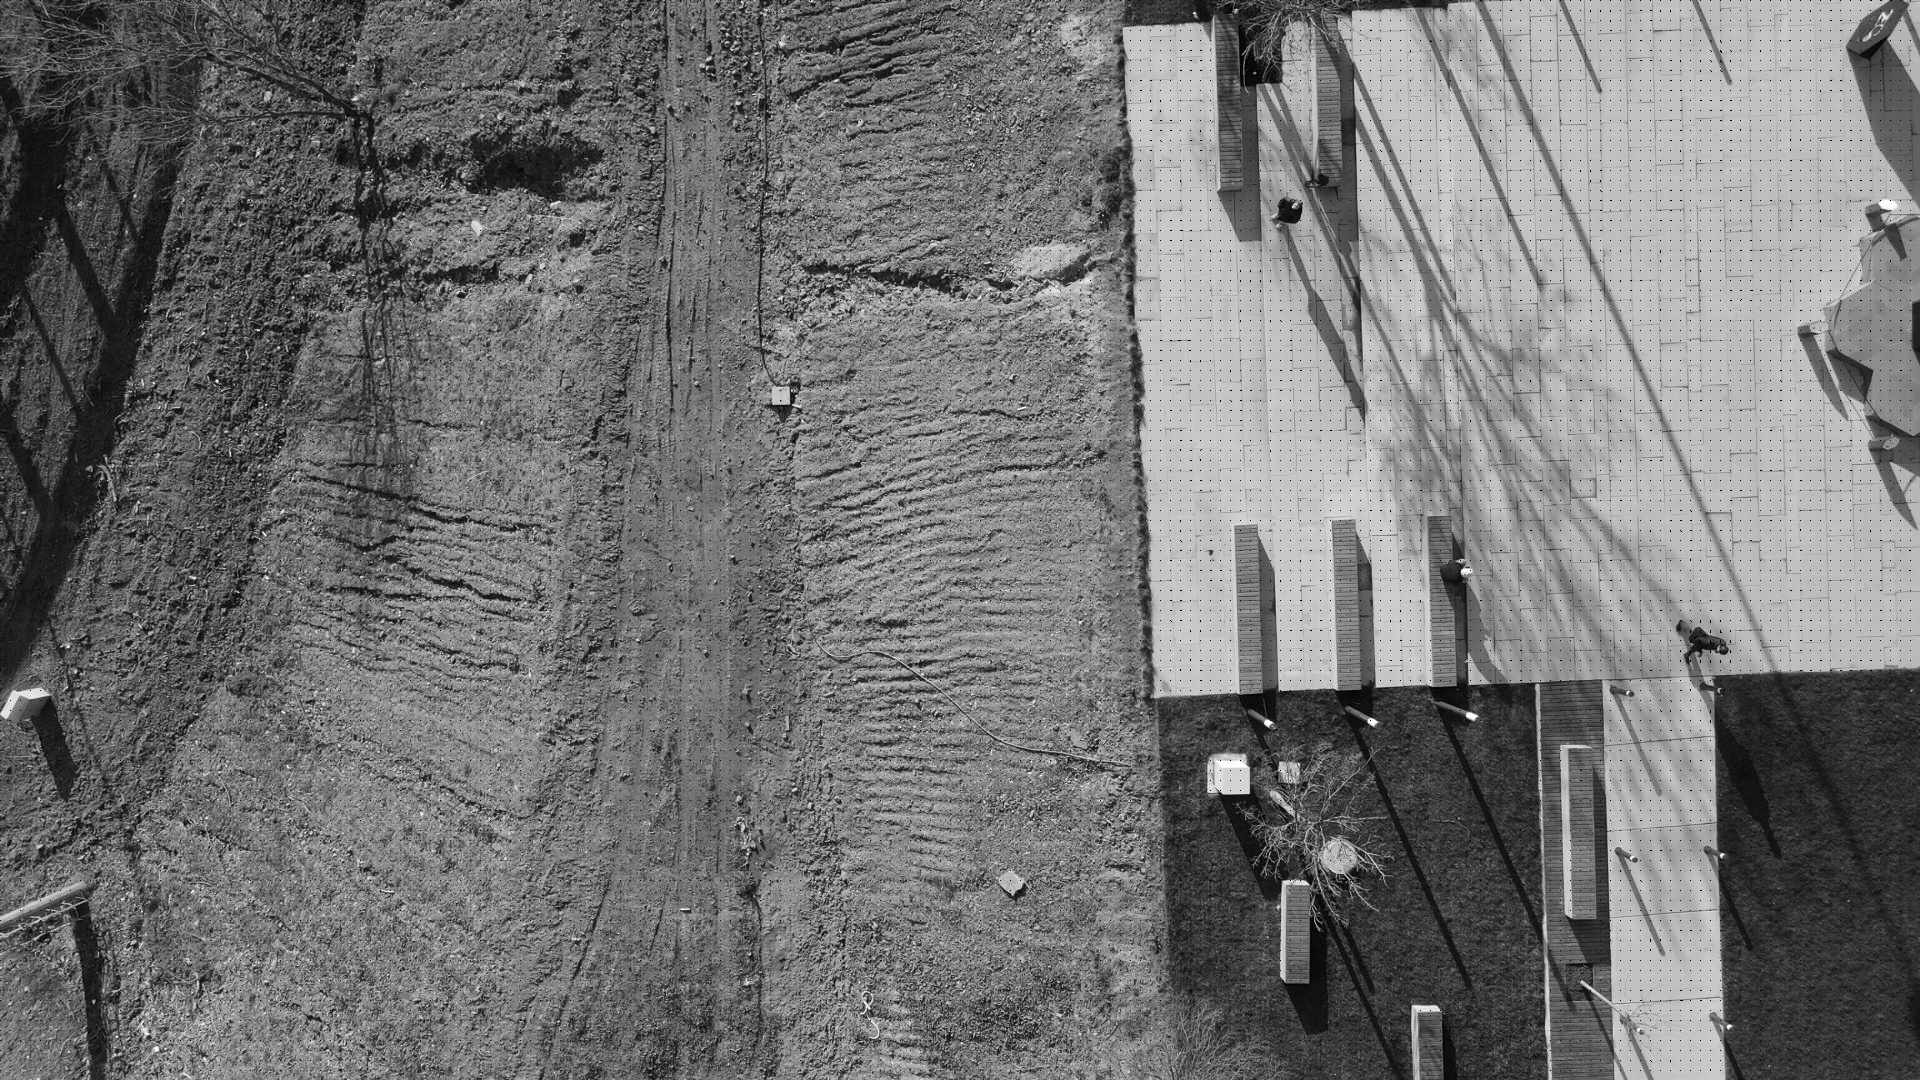

In [ ]:
flow_params = dict(pyr_scale=0.8, levels=5, winsize=15, iterations=5, poly_n=5, poly_sigma=1.2, flags=0)


flows = []
for i in range(1,len(images)):
# Optik akışı hesapla
  flow = cv2.calcOpticalFlowFarneback(images[i-1], images[i], None, **flow_params)
  flows.append(flow)

  if (i%5 == 0):

    # Optik akış vektörlerini görüntü üzerinde çiz
    h, w = images[i-1].shape[:2]  # Görüntü boyutu
    y, x = np.mgrid[0:h:10, 0:w:10].reshape(2, -1)  # Optik akış vektörlerini çizmek için örnek noktaları al
    flow_x, flow_y = flow[y, x].T  # Akış vektörlerini al
    flow_x = flow_x.astype(np.int32)  # Tamsayıya dönüştür
    flow_y = flow_y.astype(np.int32)  # Tamsayıya dönüştür
    lines = np.vstack([x, y, x + flow_x, y + flow_y]).T.reshape(-1, 2, 2)  # Akış vektörlerini çizgiye dönüştür
    line_color = (0, 255, 0)  # Yeşil renk
    line_thickness = 1
    for (x1, y1), (x2, y2) in lines:
        cv2.line(images[i-1], (x1, y1), (x2, y2), line_color, line_thickness)

    # Görüntüyü göster
    cv2_imshow(images[i-1])


In [ ]:
from sklearn.linear_model import RANSACRegressor
import matplotlib.pyplot as plt

def estimate_camera_motion(optical_flow_vectors):
    # Optik akış vektörlerini x ve y bileşenleri olarak ayırın
    x = optical_flow_vectors[:, 0]
    y = optical_flow_vectors[:, 1]
    rh_x = np.median(np.abs(x - np.median(x)))
    rh_y = np.median(np.abs(y - np.median(y)))
    # x ve y bileşenleri için ayrı ayrı RANSAC regresörü oluşturun
    ransac_x = RANSACRegressor(min_samples = 0.1, residual_threshold = rh_x, max_trials = 750, stop_score = 0.95)
    ransac_y = RANSACRegressor(min_samples = 0.1, residual_threshold = rh_y, max_trials = 750, stop_score = 0.95)

    # Her bileşen için regresyona uygun formata dönüştürün
    X = np.arange(len(x)).reshape(-1, 1)  # Sıralı index değeri

    # RANSAC ile regresyonu uygulayın
    ransac_x.fit(X, x)
    ransac_y.fit(X, y)

    # En iyi modelin katsayılarını alın
    translation_x = ransac_x.estimator_.coef_
    translation_y = ransac_y.estimator_.coef_

    # Translation vektörünü birleştirin
    translation = np.array([translation_x[0], translation_y[0]])

    return translation

def visualize_optical_flow_and_motion(optical_flow_vectors, translation):
    # Optik akış vektörlerini ve tahmin edilen hareketi görselleştir
    x = optical_flow_vectors[:, 0]
    y = optical_flow_vectors[:, 1]

    plt.figure(figsize=(10, 6))
    plt.quiver(np.arange(len(x)), np.zeros_like(x), x, y, angles='xy', scale_units='xy', scale=1, color='r', label='Optical Flow Vectors')
    plt.quiver(np.arange(len(x)), np.zeros_like(x), np.ones_like(x) * translation[0], np.ones_like(y) * translation[1], angles='xy', scale_units='xy', scale=1, color='b', label='Estimated Translation')
    plt.legend()
    plt.title('Optical Flow Vectors and Estimated Translation')
    plt.xlabel('Index')
    plt.ylabel('Flow')
    plt.grid()
    plt.show()

pixel_size_x = imageSize[0] / focalLength[0]
pixel_size_y = imageSize[1] / focalLength[1]

# Dönüşüm faktörünü hesaplama (conversion factor)
conversion_factor = np.array([1 / pixel_size_x, 1 / pixel_size_y])
print(conversion_factor)

current_position = np.array([0.0, 0.0])  # Başlangıç konumu (0,0)

print("Start position is: (0,0)")
for flow in flows:
  flattened_optical_flow_vectors = np.reshape(flow, (-1, 2))
  estimated_translation = estimate_camera_motion(flattened_optical_flow_vectors)
  # visualize_optical_flow_and_motion(flattened_optical_flow_vectors, estimated_translation)
  print(estimated_translation)
  current_position+= (estimated_translation * conversion_factor)
  print("Current Position Is: (", current_position[0],",",current_position[1],")")
# Optik akış vektörlerini içeren bir numpy dizisi örneği
flattened_optical_flow_vectors = np.reshape(flows[1], (-1, 2))
# Kameranın hareketini tahmin etmek için RANSAC kullanarak çağırın
estimated_translation = estimate_camera_motion(flattened_optical_flow_vectors)

print("Estimated translation:", estimated_translation)

[1.30861111 0.73895833]
Start position is: (0,0)
[ 3.89174436e-08 -2.88690794e-09]
Current Position Is: ( 5.0927799129497524e-08 , -2.1333046822282416e-09 )
[-1.58536369e-07  1.92368438e-08]
Current Position Is: ( -1.5653465485847613e-07 , 1.2081921321288458e-08 )


KeyboardInterrupt: 

In [ ]:
import numpy as np
import cv2
from sklearn.linear_model import RANSACRegressor

def estimate_camera_motion(optical_flow_vectors):
    # Optik akış vektörlerini kullanarak kameranın hareketini tahmin etmek için RANSAC kullanın

    # Optik akış vektörlerini x ve y bileşenleri olarak ayırın
    x = optical_flow_vectors[:, 0]
    y = optical_flow_vectors[:, 1]

    # RANSAC regresörünü oluşturun
    ransac = RANSACRegressor()

    # Optik akış vektörlerini regresyona uygun formata dönüştürün
    X = np.vstack([x, y]).T

    # RANSAC ile regresyonu uygulayın
    ransac.fit(X, X)

    # En iyi modelin katsayılarını alın
    translation = ransac.estimator_.coef_

    return translation

# Başlangıç konumu ve dönüşüm faktörü
pixel_size_x = imageSize[0] / focalLength[0]
pixel_size_y = imageSize[1] / focalLength[1]
conversion_factor = np.array([1 / pixel_size_x, 1 / pixel_size_y])

current_position = np.array([0.0, 0.0])  # Başlangıç konumu (0,0)

print("Start position is: (0,0)")
for flow in flows:
    # Optik akış vektörlerini düzleştirme
    flattened_optical_flow_vectors = np.reshape(flow, (-1, 2))

    # Kameranın hareketini tahmin etme
    estimated_translation = estimate_camera_motion(flattened_optical_flow_vectors)

    # Hesaplanmış tahmini hareketi gerçek dünya birimlerine dönüştürme ve konumu güncelleme
    current_position += (estimated_translation * conversion_factor)

    print("Current Position Is: (", current_position[0], ",", current_position[1], ")")


In [ ]:
# def calc_normalized_coord(principalPoint, focalLength, img):

#   # Piksel koordinatlarını oluştur
#   u = np.arange(img.shape[1])  # Sütun indeksleri (genişlik)
#   v = np.arange(img.shape[0])  # Satır indeksleri (yükseklik)

#   # Piksel koordinatlarını matrislere dönüştür
#   U, V = np.meshgrid(u, v)

#   # Normalleştirilmiş koordinatları hesapla
#   Xn = (U - principalPoint[0]) / focalLength[0]
#   Yn = (V - principalPoint[1]) / focalLength[1]

#   return Xn, Yn

# normalized_imgs = []
# for img in images:
#   normalized_imgs.append(calc_normalized_coord(principalPoint,focalLength,img))
# normalized_imgs[0]

(array([[-0.67223088, -0.67152331, -0.67081575, ...,  0.68416904,
          0.6848766 ,  0.68558416],
        [-0.67223088, -0.67152331, -0.67081575, ...,  0.68416904,
          0.6848766 ,  0.68558416],
        [-0.67223088, -0.67152331, -0.67081575, ...,  0.68416904,
          0.6848766 ,  0.68558416],
        ...,
        [-0.67223088, -0.67152331, -0.67081575, ...,  0.68416904,
          0.6848766 ,  0.68558416],
        [-0.67223088, -0.67152331, -0.67081575, ...,  0.68416904,
          0.6848766 ,  0.68558416],
        [-0.67223088, -0.67152331, -0.67081575, ...,  0.68416904,
          0.6848766 ,  0.68558416]]),
 array([[-0.38298534, -0.38298534, -0.38298534, ..., -0.38298534,
         -0.38298534, -0.38298534],
        [-0.38228052, -0.38228052, -0.38228052, ..., -0.38228052,
         -0.38228052, -0.38228052],
        [-0.3815757 , -0.3815757 , -0.3815757 , ..., -0.3815757 ,
         -0.3815757 , -0.3815757 ],
        ...,
        [ 0.37610685,  0.37610685,  0.37610685, ...,  

In [ ]:
crop_img = images[0][325:365, 670:760]


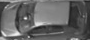

In [ ]:
cv2_imshow(crop_img)

In [ ]:
scale = 0.01791  # Ölçek faktörü